# Logistic Regression

# Bank_Full dataset

In [1]:
# import all required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
# load Bank_full dataset
df = pd.read_csv("/Users/Admin/Documents/data science assignment/logistic regression/bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
df= df.rename(columns = {"Target": "y"},inplace = False)

In [7]:
labelencoder_bank = LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


# Data Analysis

In [9]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [10]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22.936055,4.339762,1.167725,1.224813,0.018027,1963.307469,0.555838,0.160226,0.640242,14.806419,5.523014,255.338502,1.762381,40.154188,0.573356,2.559974,0.116985
std,10.618004,3.272657,0.608230,0.747997,0.133049,1463.533246,0.496878,0.366820,0.897951,8.322476,3.006911,239.660852,3.075904,96.917547,1.877700,0.989059,0.321406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,1.000000,1.000000,1.000000,0.000000,988.000000,0.000000,0.000000,0.000000,7.000000,3.000000,103.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,21.000000,4.000000,1.000000,1.000000,0.000000,1364.000000,1.000000,0.000000,0.000000,15.000000,6.000000,180.000000,1.000000,0.000000,0.000000,3.000000,0.000000
75%,30.000000,7.000000,2.000000,2.000000,0.000000,2344.000000,1.000000,0.000000,2.000000,20.000000,8.000000,319.000000,2.000000,0.000000,0.000000,3.000000,0.000000
max,76.000000,11.000000,2.000000,3.000000,1.000000,7167.000000,1.000000,1.000000,2.000000,30.000000,11.000000,1572.000000,47.000000,558.000000,40.000000,3.000000,1.000000


In [11]:
df.groupby('y').mean()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,
0,22.838936,4.291594,1.157632,1.206778,0.019112,1919.161540,0.581008,0.169330,0.688743,14.892290,5.549797,219.759030,1.844697,36.575472,0.495166,2.587997
1,23.669125,4.703347,1.243902,1.360938,0.009832,2296.526186,0.365854,0.091511,0.274154,14.158253,5.320855,523.896578,1.141047,67.166761,1.163547,2.348459


In [12]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

<AxesSubplot:>

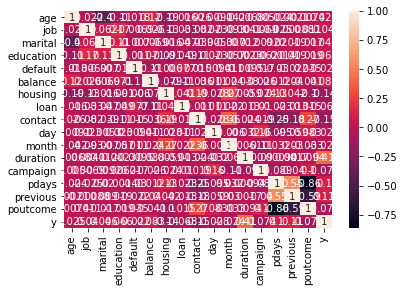

In [13]:
#Verifying null values
cor_mat=df.corr()
fig = plt.Figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [14]:
df.drop(['default'],inplace=True,axis = 1)

In [15]:
df.isna().any()

age          False
job          False
marital      False
education    False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [16]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
pd.crosstab(df.y,df.loan) 

loan,0,1
y,,
0,33162,6760
1,4805,484


<AxesSubplot:xlabel='y'>

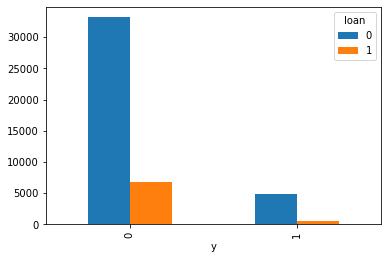

In [18]:
pd.crosstab(df.y,df.loan).plot(kind = 'bar') 

<AxesSubplot:xlabel='y'>

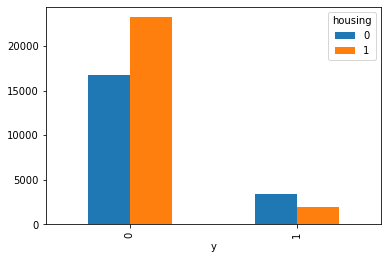

In [19]:
pd.crosstab(df.y,df.housing).plot(kind = 'bar') 

# Define X and y

In [20]:
#Define X and y
X = df.drop(['y','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = df['y']

# Get Dummies Values

In [21]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

# Model Building

In [22]:
# Model building 
from sklearn.linear_model import LogisticRegression
df.shape

(45211, 16)

In [23]:
X = df.drop(['y','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = df['y']
classifier = LogisticRegression()
classifier.fit(X,y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
classifier.coef_  

array([[ 0.00763609,  0.00013729,  0.00385156, -0.08713076,  0.00237658,
         0.10477339]])

In [25]:
classifier.predict_proba (X) 

array([[0.89326164, 0.10673836],
       [0.94989072, 0.05010928],
       [0.96506518, 0.03493482],
       ...,
       [0.11883129, 0.88116871],
       [0.83774309, 0.16225691],
       [0.57264567, 0.42735433]])

In [26]:
y_pred = classifier.predict(X)
df["y_pred"] = y_pred
df  

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,40,4,1,2,3036,1,0,2,4,8,261,0,0,0,3,0,0
1,26,9,2,1,945,1,0,2,4,8,151,0,0,0,3,0,0
2,15,2,1,1,918,1,1,2,4,8,76,0,0,0,3,0,0
3,29,1,1,3,2420,1,0,2,4,8,92,0,0,0,3,0,0
4,15,11,2,3,917,0,0,2,4,8,198,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,1741,0,0,0,16,9,975,2,0,0,3,1,1
45207,53,5,0,0,2639,0,0,0,16,9,456,1,0,0,3,1,0
45208,54,5,1,1,5455,0,0,0,16,9,1116,4,181,3,2,1,1
45209,39,1,1,1,1584,0,0,1,16,9,508,3,0,0,3,0,0


In [27]:
y_prob = pd.DataFrame(classifier.predict_proba(X))
new_df = pd.concat([df,y_prob],axis=1)
new_df 

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,40,4,1,2,3036,1,0,2,4,8,261,0,0,0,3,0,0,0.893262,0.106738
1,26,9,2,1,945,1,0,2,4,8,151,0,0,0,3,0,0,0.949891,0.050109
2,15,2,1,1,918,1,1,2,4,8,76,0,0,0,3,0,0,0.965065,0.034935
3,29,1,1,3,2420,1,0,2,4,8,92,0,0,0,3,0,0,0.949978,0.050022
4,15,11,2,3,917,0,0,2,4,8,198,0,0,0,3,0,0,0.945265,0.054735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,1741,0,0,0,16,9,975,2,0,0,3,1,1,0.445217,0.554783
45207,53,5,0,0,2639,0,0,0,16,9,456,1,0,0,3,1,0,0.804680,0.195320
45208,54,5,1,1,5455,0,0,0,16,9,1116,4,181,3,2,1,1,0.118831,0.881169
45209,39,1,1,1,1584,0,0,1,16,9,508,3,0,0,3,0,0,0.837743,0.162257


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[39201   721]
 [ 4286  1003]]


In [29]:
type(y_pred)

numpy.ndarray

In [32]:
pd.crosstab(y_pred,y) 

y,0,1
row_0,,
0,39201,4286
1,721,1003


In [33]:
accuracy = sum(y==y_pred)/df.shape[0]
accuracy

0.8892526155139236

In [34]:
from sklearn.metrics import classification_report 
print (classification_report (y, y_pred)) 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.58      0.19      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.74      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211



#### Accuracy of bank-full dataset for logistic regression is 89%.

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y,classifier.predict(X))
Logit_roc_score 

0.5857893278544704

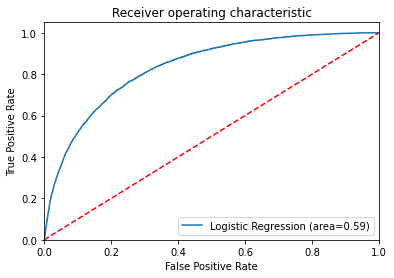

In [37]:
fpr, tpr, thresholds = roc_curve(y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [38]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1])
y_prob1

,0
0,0.106738
1,0.050109
2,0.034935
3,0.050022
4,0.054735
...,...
45206,0.554783
45207,0.195320
45208,0.881169
45209,0.162257


In [39]:
import statsmodels.api as sm  
logit = sm.Logit(y, X)
logit.fit().summary() 

Optimization terminated successfully.
         Current function value: 0.366013
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45205
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Jun 2021   Pseudo R-squ.:                -0.01424
Time:                        10:31:54   Log-Likelihood:                -16548.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0793      0.001    -64.637      0.000      -0.082      -0.077
balance       -0.0002   1.05e-05    -20.238      0.000      -0.000      -0.000
duration       0.0023   4.97e-05     46.447      0.000       0.002       0.002
campaign      -0.3216      0.011    -30.258      0.000      -0.342      -0.301
pdays         -0.0004      0.000     -2.596      0.009      -0.001      -0.000
previous       0.1000      0.008     12.905      0.000       0.085       0.115
==============================================================================
"""

In [40]:
fpr

array([0.        , 0.        , 0.        , ..., 0.98855268, 0.98855268,
       1.        ])

In [41]:
tpr

array([0.00000000e+00, 1.89071658e-04, 3.78143316e-04, ...,
       9.99810928e-01, 1.00000000e+00, 1.00000000e+00])

# Visualising Data

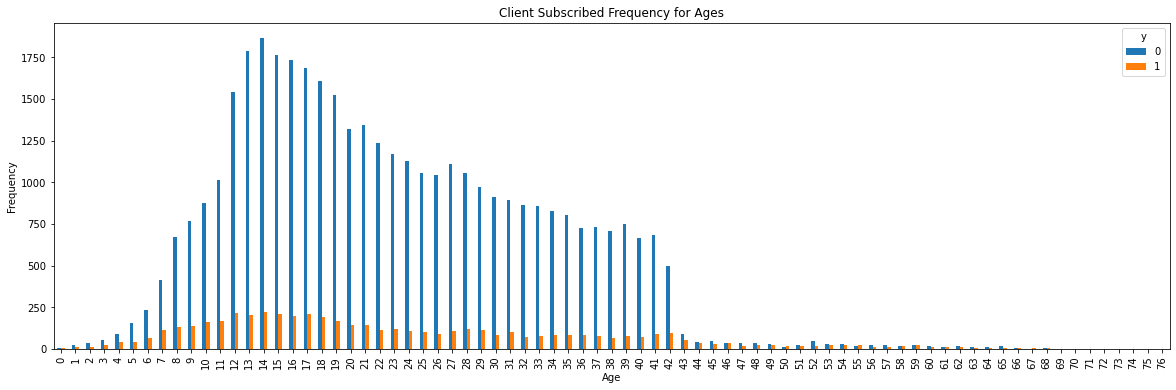

In [42]:
#Age
pd.crosstab(df.age,df.y).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

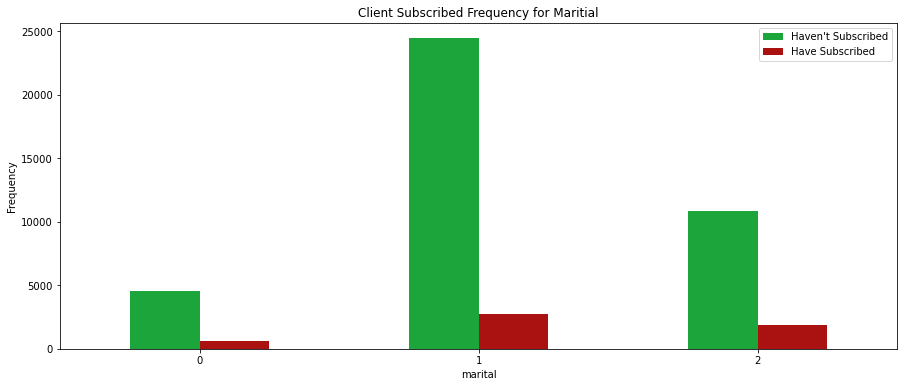

In [43]:
pd.crosstab(df.marital,df.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

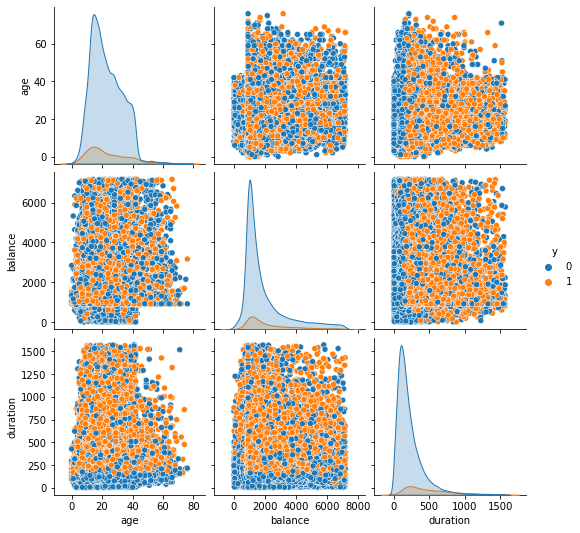

In [44]:
sns.pairplot(data=df, hue='y', vars= ['age', 'balance', 'duration'])

<AxesSubplot:xlabel='y', ylabel='count'>

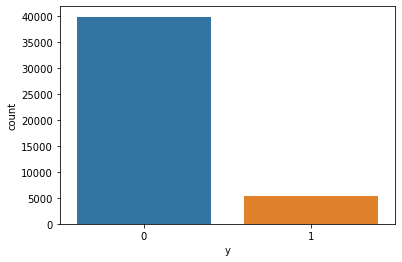

In [45]:
sns.countplot(x='y', data=df, label='Count')

<AxesSubplot:xlabel='age', ylabel='balance'>

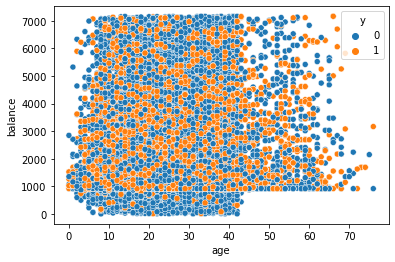

In [46]:
sns.scatterplot(x='age', y='balance',hue='y', data=df)

<AxesSubplot:>

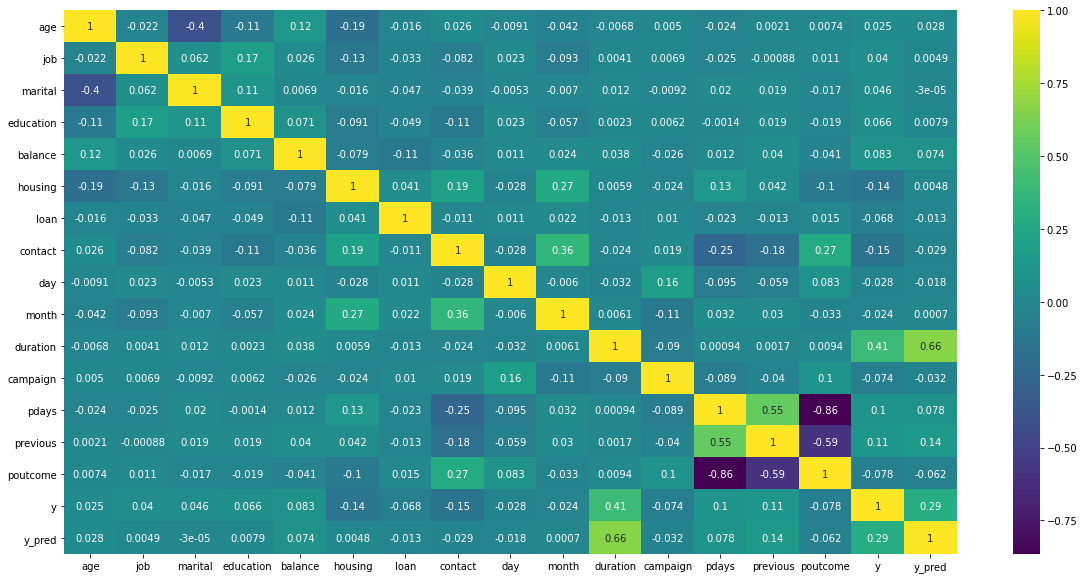

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

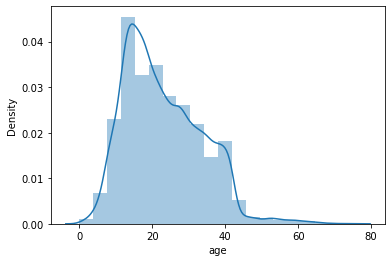

In [48]:
sns.distplot(df.age, bins = 20) 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

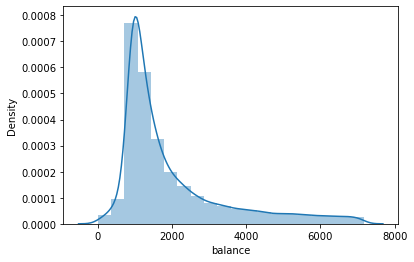

In [49]:
sns.distplot(df.balance, bins = 20) 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

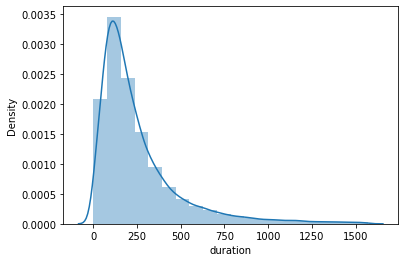

In [50]:
sns.distplot(df.duration, bins = 20) 

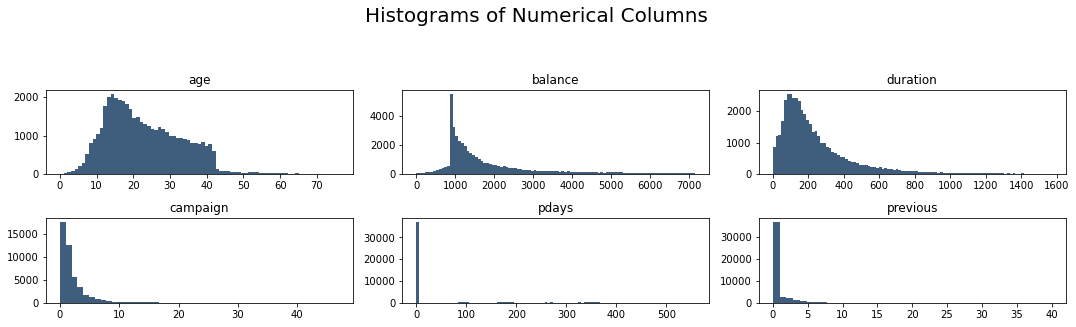

In [51]:
df2 = X
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<AxesSubplot:>

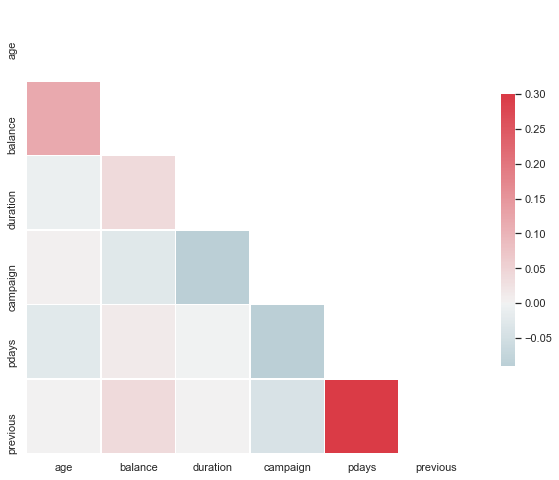

In [52]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Splitting the Dataset into Training Set and Test Set

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [54]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36168, 6) (9043, 6) (36168,) (9043,)


# Balancing the Traing Set

In [55]:
X = df.drop(['y','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = df['y']

In [56]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

# Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

# Comparing Models

In [58]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.01, penalty='l1',solver='liblinear');
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [59]:
# Predicting Test Set
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [60]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.798518,0.322326,0.655009,0.432045


<AxesSubplot:>

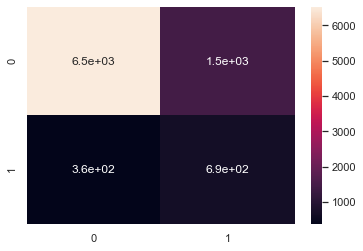

In [61]:
# Evaluating Results
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm, annot=True)

In [62]:
#Making the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7985
           1       0.32      0.66      0.43      1058

    accuracy                           0.80      9043
   macro avg       0.63      0.74      0.65      9043
weighted avg       0.87      0.80      0.83      9043



#### As observed, the Bank-full Dataset is unbalanced. And so become tough to perform pretty well the model. Another issue was the Accuracy Paradox that provides a false Accuracy final result. For this case, perhaps more data can help balance the dataset and trying to find one best final result. Perfomance of Model Accuracy: 80%.